<a href="https://colab.research.google.com/github/pavik15-ops/Task_5-EDA/blob/main/Task_5(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 5: Exploratory Data Analysis (EDA)

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("/content/pizza_sales_excel_file.xlsx")
print(df)

       pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.25        13

**1. Basic Exploration**

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB
None


In [5]:
print(df.describe())

           pizza_id      order_id      quantity  \
count  48620.000000  48620.000000  48620.000000   
mean   24310.500000  10701.479761      1.019622   
min        1.000000      1.000000      1.000000   
25%    12155.750000   5337.000000      1.000000   
50%    24310.500000  10682.500000      1.000000   
75%    36465.250000  16100.000000      1.000000   
max    48620.000000  21350.000000      4.000000   
std    14035.529381   6180.119770      0.143077   

                          order_date    unit_price   total_price  
count                          48620  48620.000000  48620.000000  
mean   2015-06-29 11:03:43.611682560     16.494132     16.821474  
min              2015-01-01 00:00:00      9.750000      9.750000  
25%              2015-03-31 00:00:00     12.750000     12.750000  
50%              2015-06-28 00:00:00     16.500000     16.500000  
75%              2015-09-28 00:00:00     20.250000     20.500000  
max              2015-12-31 00:00:00     35.950000     83.000000  
std 

In [6]:
print("\nMissing Values:")


Missing Values:


In [7]:
print(df.isnull().sum())

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


# **Write observations for each visual**

**Histogram**

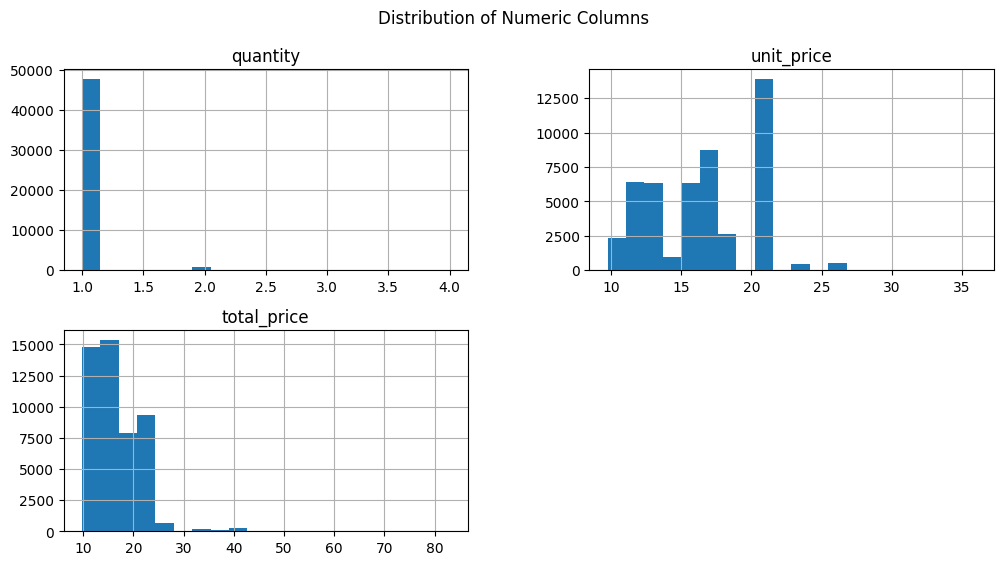

In [8]:
df[["quantity","unit_price","total_price"]].hist(bins=20, figsize=(12,6))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

Observation: Quantity is usually 1, prices are mostly between 10-20, and total sales per order vary widely.

**Boxplot - unit price**

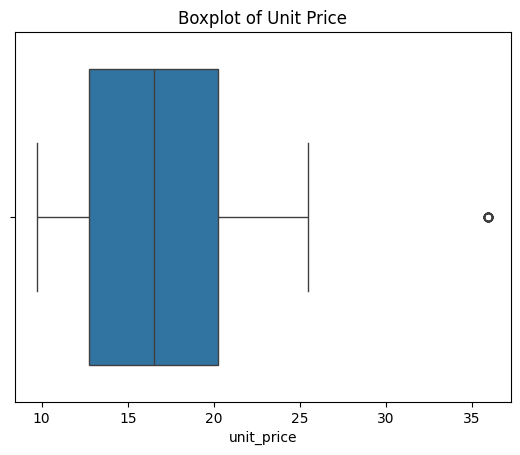

In [9]:
sns.boxplot(x=df["unit_price"])
plt.title("Boxplot of Unit Price")
plt.show()

Observation: Quantity is usually 1, prices are mostly between 10-20, and total sales per order vary widely.

**Countplot-pizza size**

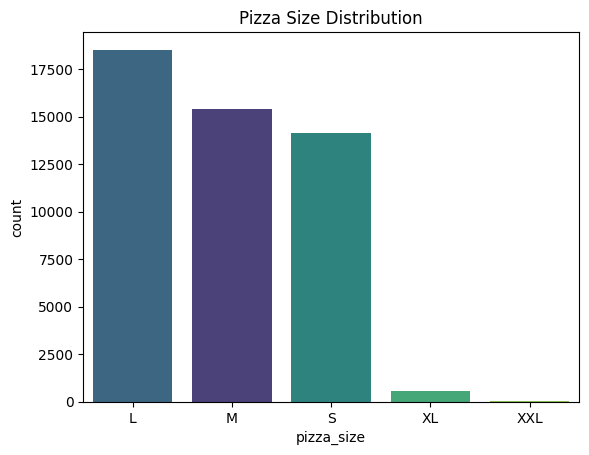

In [30]:
sns.countplot(x="pizza_size", data=df, hue="pizza_size",order=df["pizza_size"].value_counts().index, palette="viridis")
plt.title("Pizza Size Distribution")
plt.show()

Observation: Medium pizzas are the most sold, followed by Large. Extra Large and Small sizes are least common.

**Countplot - pizza category**

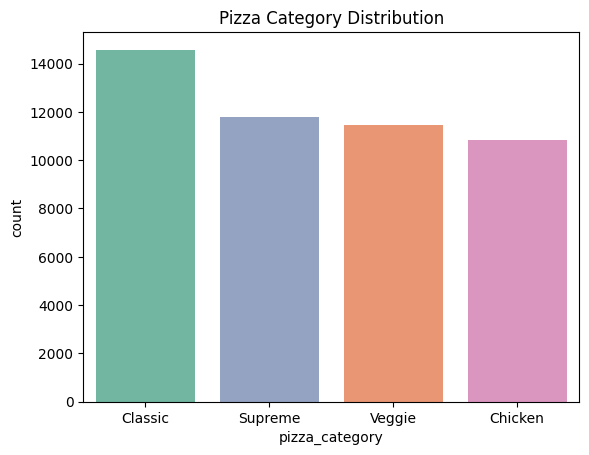

In [28]:
sns.countplot(x="pizza_category",data=df,order=df["pizza_category"].value_counts().index,hue="pizza_category",palette="Set2",legend=False)
plt.title("Pizza Category Distribution")
plt.show()


Observation: Classic and Veggie categories dominate the orders, while Chicken and Supreme are less frequent.

 # **Plot histograms, boxplots, scatterplots**

**Scatterplot - unit vs total price**

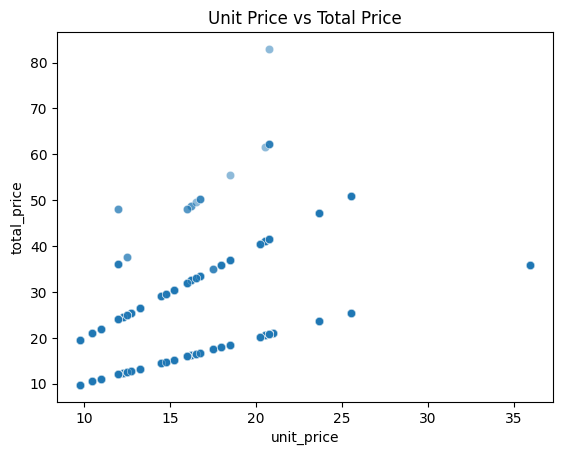

In [12]:
sns.scatterplot(x="unit_price", y="total_price", data=df, alpha=0.5)
plt.title("Unit Price vs Total Price")
plt.show()

**Boxplot - price by size**

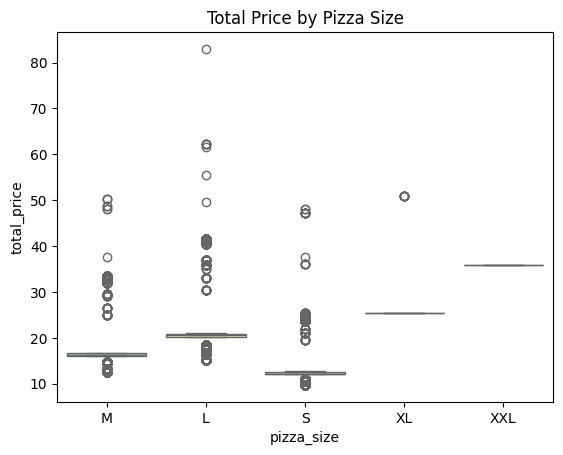

In [29]:
sns.boxplot(x="pizza_size", y="total_price", data=df, palette="Set3",hue="pizza_size")
plt.title("Total Price by Pizza Size")
plt.show()

#**use sns.pairplot(), sns.heatmap() for visualization**

**Pairplot**

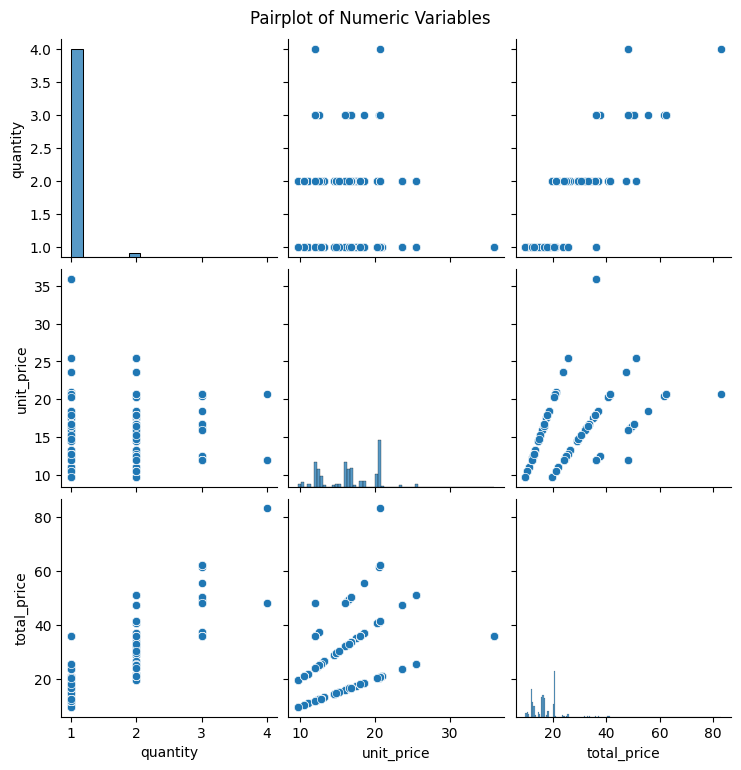

In [14]:
sns.pairplot(df[["quantity","unit_price","total_price"]])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

**Correlation heatmap**

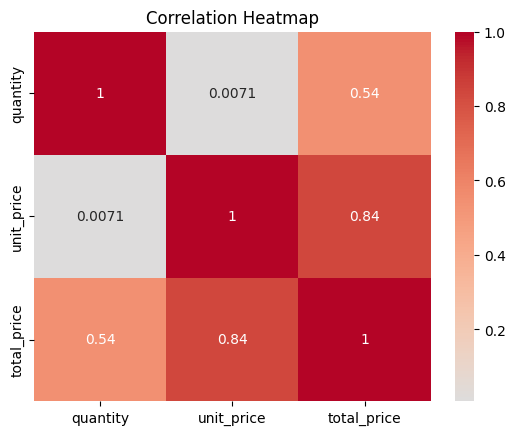

In [15]:
corr = df[["quantity","unit_price","total_price"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

 # **Identify relationships and trends**

**Top 10 by quantity**

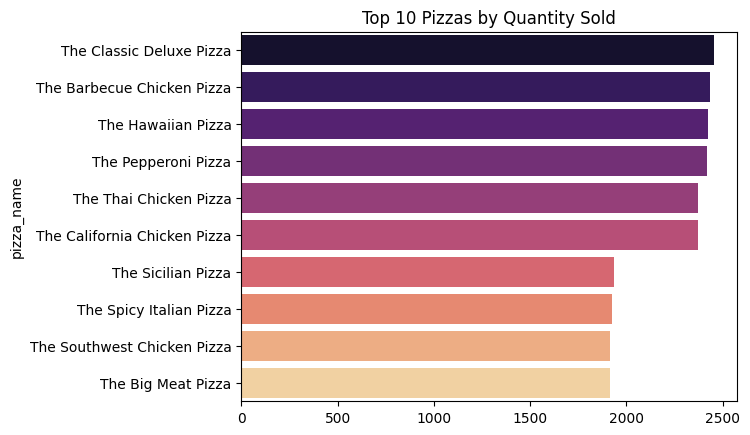

In [24]:
top_pizzas = df.groupby("pizza_name")["quantity"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, hue=top_pizzas.index,
            dodge=False, palette="magma", legend=False)
plt.title("Top 10 Pizzas by Quantity Sold")
plt.show()

**Top 10 by revenue**

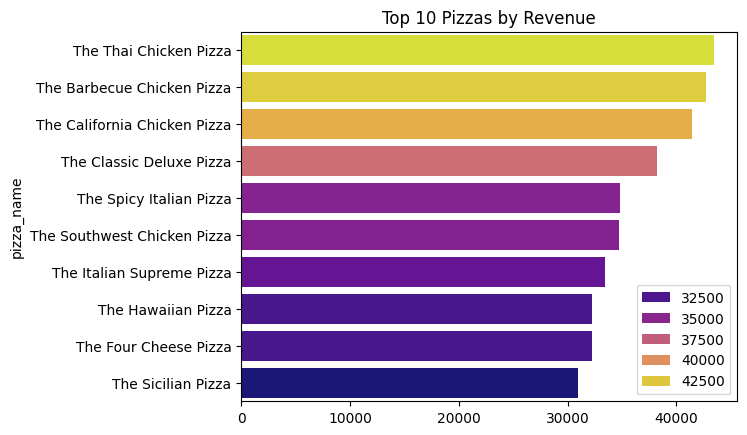

In [25]:
top_revenue = df.groupby("pizza_name")["total_price"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_revenue.values, y=top_revenue.index,hue=top_revenue.values, palette="plasma")
plt.title("Top 10 Pizzas by Revenue")
plt.show()

**Summary of Findings**

1. Medium pizzas are the most popular size, followed by Large.

2. Classic and Veggie categories dominate sales volume.

3. Total price is highly correlated with both unit price and quantity.

4. Higher prices and larger sizes increase total sales, though Medium is most frequent.

5. Sales show monthly variations, suggesting seasonal demand or promotions.

6. A few pizzas dominate both quantity and revenue, showing best-sellers.
